In [3]:
%matplotlib inline
import cv2
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
from mask_scripts import juxtapose_mole_and_background

In [49]:
def display_images(img_array):
    
    cmap = None
    
    #set up dims of subplot arrangement
    rows = len(img_array)/3+1
    cols = 3
    
    #make each image visible
    plt.figure(figsize=(20, 20))
    
    #add each image to plot
    for i, img in enumerate(img_array):
        # use gray scale color map if there is only one channel
        cmap = 'gray' if len(img.shape)==2 else cmap
        
        plt.subplot(rows, cols, i+1)
        plt.imshow(img, cmap=cmap)
    
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

# Goal

## Make a function that can take a cancer image and a background
## and put the cancer mole on the background

In [37]:
img = cv2.imread('cancer.jpeg')
mask = get_cancer_mask(img)

In [38]:
mask[:,:,0:1].shape

(96, 127, 1)

Use bitwise AND to isalte mole in original image

In [39]:
res = cv2.bitwise_and(img, img, mask=mask[:,:,0:1].astype(np.int8))

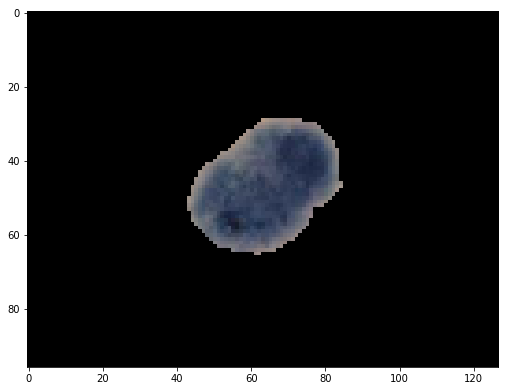

In [40]:
display_images([res])

Use some Bitfiddling np array magic to juxtapose two images

In [91]:
def juxtapose_mole_and_background(cancer_img, background_img):
    
    mask = get_cancer_mask(cancer_img)
    
    mole = cv2.bitwise_and(cancer_img, cancer_img, mask=mask)
    
    display_images([mole])
    
    print(mask)
    mask = 1 - mask
    print(mask)
    
    cleared_background = cv2.bitwise_and(background_img, background_img, mask=mask)
    
    display_images([cleared_background])
    
    mixed_img = cv2.bitwise_or(mole, cleared_background)
    
    return mixed_img

Test the above function with a background image

We can use this to train our detection network on a shitload of backgrounds

In [5]:
img = cv2.imread('cancer.jpeg')
background = cv2.imread("background.jpg")
background = cv2.resize(background, (img.shape[1], img.shape[0]) )

display_images([background])

display_images([juxtapose_mole_and_background(img, background)])

NameError: name 'display_images' is not defined